#import necessary Libraries

In [2]:
import torch
import torch.nn as nn #neural network module
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#prepare data

here, I am making a datasets where I have taken 100 samples value as my input which denotes X_numpy. And it will create a 2D array with element in a single coloum! for your better understanding just print(X_numpy)

Y_numpy is just output and that's why n_features=1. It will create a 1D array with 100 coloumn and 1 row. for your better understanding just print (Y_numpy)

In [29]:
X_numpy,Y_numpy = datasets.make_regression(n_samples=100,n_features=1, noise=20, random_state = 1)
#print( X_numpy)

#CONVERT NUMPY TO TORCH
X= torch.from_numpy(X_numpy.astype(np.float32)) 
#print(X)
Y= torch.from_numpy(Y_numpy.astype(np.float32))
#print(Y.shape) #torch.Size([100])

#reshape 
Y= Y.view(Y.shape[0],1)
#print(Y)
n_samples,n_features = X.shape #it will take X.shape's first value as n_samples and 2nd element as n_features 
#print(n_samples)
#print(n_features)

# model creation and declare

In [30]:
input_size = n_features
output_size = 1
model= nn.Linear(input_size,output_size) 

#loss and optimizer

In [31]:
learning_rate= 0.001
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate) #optimizer will optimize model parameters and learning rate for next update

#training loop

In [33]:
num_epochs=100
for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted=model(X)
  loss=criterion(y_predicted,Y) #actual output = Y

  #backward pass .backward() will back propagate and calculate the gradients
  loss.backward()

  #update
  optimizer.step()
  optimizer.zero_grad()


if (epoch+1)%10 == 0:
  print(f"epoch: {epoch+1}, loss={loss.item():.4f}")

epoch: 100, loss=3156.4800


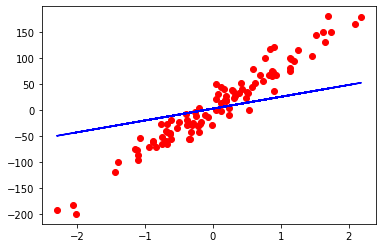

In [35]:
#plot
predicted= model(X).detach().numpy() #//it will create a new tensor where our gradient calculation attribute is false

plt.plot(X_numpy, Y_numpy,'ro') 
plt.plot(X_numpy,predicted,'b')
plt.show()

